In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
import sys
sys.path.append('../')  # Add the parent folder to the Python path

from sql_functions import get_dataframe  # Import the function

main_cities = [
    "New York, NY",
    "Boston, MA",
    "Washington, DC",
    "Newark, NJ",
]

side_cities = [
    "Miami, FL",
    "Houston, TX",
    "San Francisco, CA",
    "Seattle, WA"
]


In [2]:
flights_2015 = get_dataframe('SELECT * FROM group3.flights_2015')
flights_2016 = get_dataframe('SELECT * FROM group3.flights_2016')
flights_2017 = get_dataframe('SELECT * FROM group3.flights_2017')

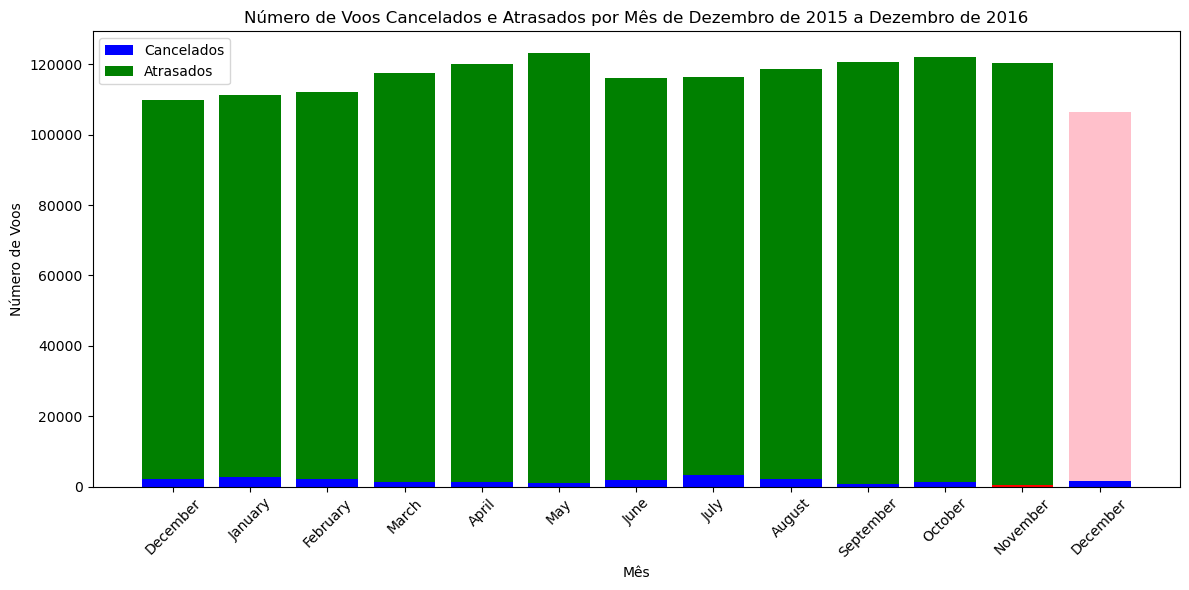

In [19]:
flights_2016['cancelled'] = flights_2016['cancelled'].astype(int)

flights_2015_dec = flights_2015[flights_2015['month'] == 12]

# Concatenando os DataFrames de 2016 e dezembro de 2015
flights_2016_2015 = pd.concat([flights_2015_dec, flights_2016], ignore_index=True)

# Agrupando os dados por ano e mês e calculando o número de voos cancelados e atrasados
monthly_counts = flights_2016_2015.groupby(['year', 'month']).agg({
    'cancelled': 'sum',
    'had_delay': 'sum'
}).reset_index()

# Mapeando números de meses para os nomes dos meses
monthly_counts['month_name'] = monthly_counts['month'].apply(lambda x: calendar.month_name[x])

# Definindo cores específicas para cancelamentos e atrasos
colors_cancelled = ['blue'] * 11 + ['red']  # Dezembro de 2015 com cor azul, outros meses com cor azul
colors_delay = ['green'] * 12 + ['pink'] # Todos os meses com cor verde

# Plotagem do gráfico de barras
plt.figure(figsize=(12, 6))

# Plotando as barras de cancelamentos
plt.bar(range(len(monthly_counts)), monthly_counts['cancelled'], color=colors_cancelled, label='Cancelados')
# Plotando as barras de atrasos
plt.bar(range(len(monthly_counts)), monthly_counts['had_delay'], bottom=monthly_counts['cancelled'], color=colors_delay, label='Atrasados')

plt.title('Número de Voos Cancelados e Atrasados por Mês de Dezembro de 2015 a Dezembro de 2016')
plt.xlabel('Mês')
plt.ylabel('Número de Voos')
plt.xticks(range(len(monthly_counts)), monthly_counts['month_name'], rotation=45)  # Definindo os rótulos do eixo x como os nomes dos meses
plt.legend()
plt.tight_layout()
plt.show()